In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./swim_eda2.csv')

## 1. 수영복 구매자(리뷰어) 평균 키/몸무게와 대한민국 평균 키/몸무게 비교

In [103]:
filtered = df[
    (df['height'] >= 140) & (df['height'] <= 190) &
    (df['weight'] >= 30) & (df['weight'] <= 100)
]

# 리뷰어 평균 계산
reviewer_avg = filtered.groupby('gender')[['height', 'weight']].mean().round(2)

# 한국 평균 수동 입력
korean_avg = {
    'Man': {'height': 173.5, 'weight': 74.0},
    'Woman': {'height': 161.0, 'weight': 57.0}
}

# 비교 테이블 생성
comparison = pd.DataFrame({
    '리뷰어 평균 키': [reviewer_avg.loc['Man', 'height'], reviewer_avg.loc['Woman', 'height']],
    '리뷰어 평균 몸무게': [reviewer_avg.loc['Man', 'weight'], reviewer_avg.loc['Woman', 'weight']],
    '한국 평균 키': [korean_avg['Man']['height'], korean_avg['Woman']['height']],
    '한국 평균 몸무게': [korean_avg['Man']['weight'], korean_avg['Woman']['weight']],
}, index=['Man', 'Woman'])

print(comparison)

       리뷰어 평균 키  리뷰어 평균 몸무게  한국 평균 키  한국 평균 몸무게
Man      174.10       73.38    173.5       74.0
Woman    162.11       55.97    161.0       57.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

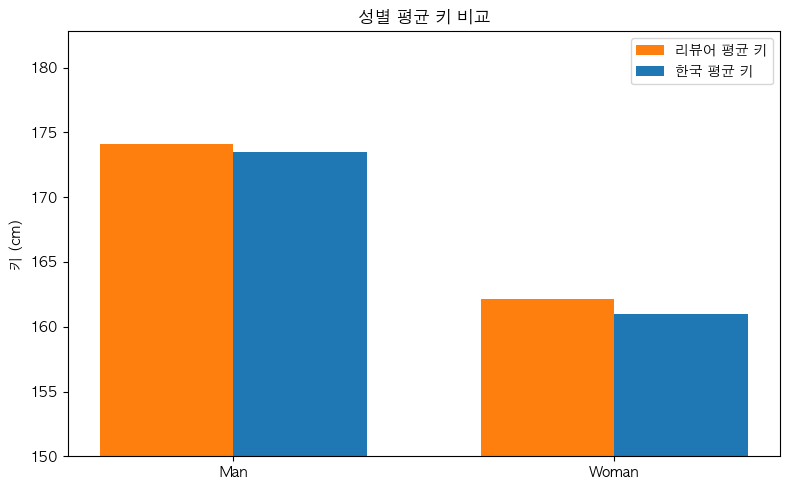

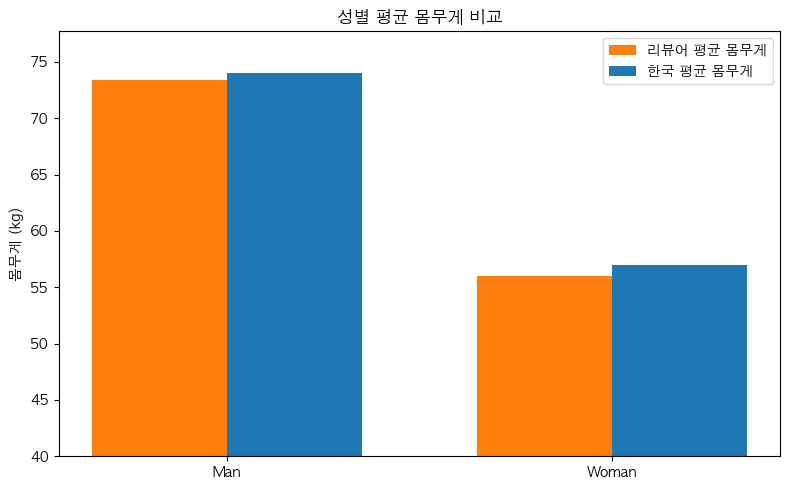

In [113]:
# 성별 순서 고정
gender_order = ['Man', 'Woman']
bar_width = 0.35
x = range(len(gender_order))

# 그래프용 데이터 추출
height_vals = [reviewer_avg.loc[g, 'height'] for g in gender_order]
weight_vals = [reviewer_avg.loc[g, 'weight'] for g in gender_order]
k_height_vals = [korean_avg[g]['height'] for g in gender_order]
k_weight_vals = [korean_avg[g]['weight'] for g in gender_order]

c1 = '#ff7f0e'
c2 = '#1f77b4'

# 키 비교
plt.figure(figsize=(8, 5))
plt.bar([i - bar_width/2 for i in x], height_vals, width=bar_width, label='리뷰어 평균 키', color=c1)
plt.bar([i + bar_width/2 for i in x], k_height_vals, width=bar_width, label='한국 평균 키', color=c2)
plt.xticks(x, gender_order)
plt.ylabel('키 (cm)')
plt.ylim(150)
plt.title('성별 평균 키 비교')
plt.legend()
plt.tight_layout()
plt.show()

# 몸무게 비교
plt.figure(figsize=(8, 5))
plt.bar([i - bar_width/2 for i in x], weight_vals, width=bar_width, label='리뷰어 평균 몸무게', color=c1)
plt.bar([i + bar_width/2 for i in x], k_weight_vals, width=bar_width, label='한국 평균 몸무게', color=c2)
plt.xticks(x, gender_order)
plt.ylabel('몸무게 (kg)')
plt.ylim(40)
plt.title('성별 평균 몸무게 비교')
plt.legend()
plt.tight_layout()
plt.show()

- 리뷰어 평균 키는 대한민국 평균보다 남성의 경우 0.6cm, 여성의 경우 1.11cm 더 컸다.
- 리뷰어 평균 몸무게는 대한민국 평균보다 남성의 경우 0.62kg, 1.03kg 더 적었다.

수영인들의 신체 정보는 대한민국 평균보다 키가 살짝 더 크고, 몸무게는 더 적게 나가는 것을 확인할 수 있으며, 여성의 경우 그 차이가 더 컸다.  
성인을 기준으로 한 데이터이기 때문에 여기서는 수영이 키 성장과 연관성이 있다고 말하기는 어렵지만,  
수영인들의 평균 키가 높으면서 몸무게는 더 적게 나가는 것을 확인했을 때 다이어트에 좋은 운동임은 확인할 수 있다.

## 2. 리뷰 평점 그룹별 주요 키워드 (워드클라우드)

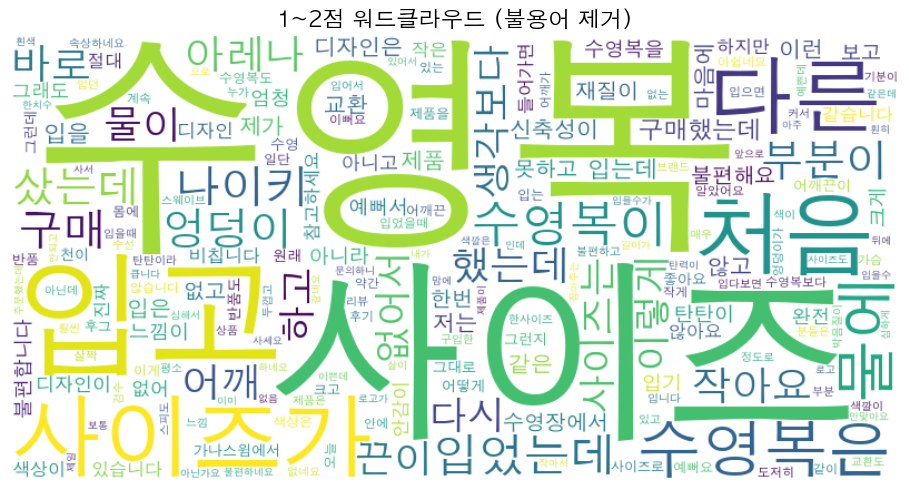

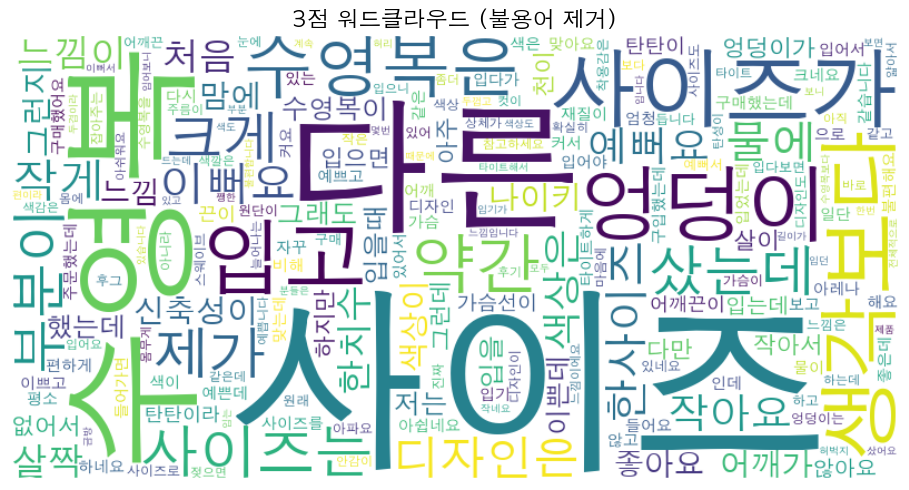

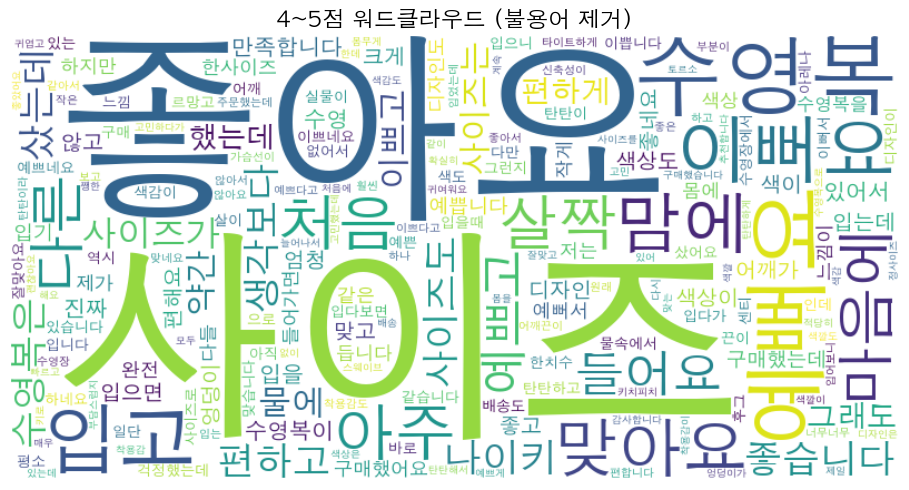

In [ ]:
import re
from wordcloud import WordCloud
from collections import Counter

# 텍스트 정제 함수
def clean_text(text):
    text = str(text)
    text = re.sub(r"[^\uAC00-\uD7A3\s]", "", text)  # 한글 + 공백만 유지
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned'] = df['review_text'].fillna("").apply(clean_text)

# 평점 그룹 나누기
def get_rating_group(rating):
    if rating in [1, 2]:
        return "1~2점"
    elif rating == 3:
        return "3점"
    elif rating in [4, 5]:
        return "4~5점"
    else:
        return None

df['rating_group'] = df['score'].apply(get_rating_group)

# 불용어 설정
stopwords = set([
    '좀', '조금', '너무', '많이', '잘', '그냥', '다', '더', '같아요',
    '정말', '그리고', '그래서', '합니다', '했어요', '보기에', '거의',
    '이거', '이건', '근데', '해서', '있어요', '없어요', '정도'
])

# 단어별로 쪼개서 빈도 계산
def get_word_frequencies(text):
    words = text.split()
    filtered = [w for w in words if w not in stopwords and len(w) > 1]
    return Counter(filtered)

# 워드클라우드 그리기 함수
def generate_wordcloud_with_stopwords(text, title):
    freqs = get_word_frequencies(text)
    wordcloud = WordCloud(
        font_path="/System/Library/Fonts/AppleGothic.ttf",  # macOS 전용
        width=800, height=400,
        background_color='white'
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{title} 워드클라우드 (불용어 제거)', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 평점 그룹별 리뷰 합치고 워드클라우드 생성
group_texts = df.groupby('rating_group')['cleaned'].apply(lambda texts: " ".join(texts)).dropna()

for group, text in group_texts.items():
    if group:
        generate_wordcloud_with_stopwords(text, group)

모든 리뷰 평점 군에서 '사이즈'에 대한 내용을 가장 많이 언급함을 알 수 있음.  
그만큼 수영복 선택에 있어서 사이즈가 가장 중요한 요소임을 확인할 수 있었다.

## 3. 리뷰 사진 첨부 여부에 따른 텍스트 길이

In [5]:
# 텍스트 길이 계산
df['text_length'] = df['review_text'].fillna("").apply(len)

# 사진 여부 그룹별 평균 계산
photo_group_stats = df.groupby('has_photo')[['text_length', 'score']].mean().round(2)

print(photo_group_stats)

           text_length  score
has_photo                    
N                68.94   4.86
Y                99.47   4.90


당연한 이야기일 수 있지만 사진을 첨부한 리뷰어들은 텍스트도 길게 정성들여 작성하였고, 평균 평점도 높은 것으로 보아 구매에 대해 만족할 수록 사진을 첨부하는 경향이 높다고 볼 수 있다.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

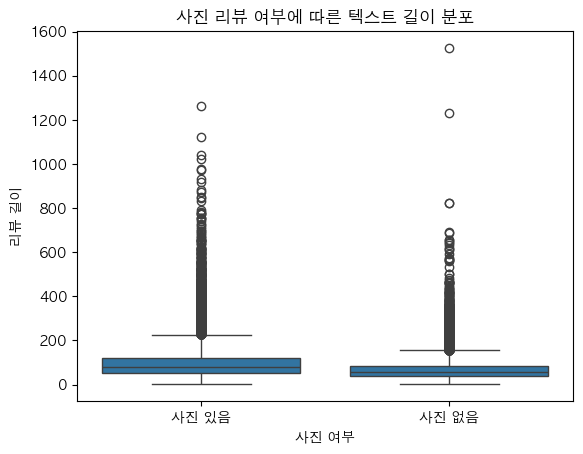

In [10]:
sns.boxplot(data=df, x='has_photo', y='text_length')
plt.title("사진 리뷰 여부에 따른 텍스트 길이 분포")
plt.xlabel("사진 여부")
plt.ylabel("리뷰 길이")
plt.xticks(['N', 'Y'], ['사진 없음', '사진 있음'])
plt.show()

사진 없는 리뷰에서, 1600자에 가까울 정도로 텍스트 길이가 긴 아웃라이어는 어떤 리뷰인지 확인해보았다.

In [14]:
# 열 너비 제한 없애기 (전체 내용 출력)
pd.set_option('display.max_colwidth', None)
# pd.reset_option('display.max_colwidth')

In [18]:
import re
def clean_text(txt):
    cleaned_text = re.sub(r'\s+', ' ', txt.replace('\n', ' ')).strip()
    return cleaned_text

In [ ]:
# 사진 없는 리뷰 아웃라이어 가장 긴 리뷰 내용
longest_review = df[df['has_photo'] == 'N'].nlargest(1, 'text_length')
longest_review['review_text'] = longest_review['review_text'].apply(clean_text)
longest_review['review_text']

53068    160/45-46 토르소 146-147(상체가 긴타입 다른분 보다 3-4cm 길다;) 가슴 80 엉덩이89-90 일반 여성복 44 또는 S, 26 착용 가나스윔 상담사 사이즈 추천 26(키,몸무게 기준) 가나스윔 사이즈 리뷰 28 추천 (키,몸무게, 평소사이즈 S기준) 검색 수린이가 수영복을 입어보지 않은 상태에서 구매하는게 가장 어려웠어요. 수영복 사이즈 미스로 교환까지해서 원하는 시간안에 입는게 어려울까봐 조마조마 샤크배송있어 든든하네요 수영복이 건조한 상태시 타이트한게 맞고 물에 들어가면 적당해진다하는데 어느정도가 적당한 타이트함인지 모르겠음 교환해야할 수 있으니 물은 못 들어감 ^^ 시착경험으로 고를때 기준점 1. 토르소 길이 2. 수영복 재질의 따른 어깨눌림 고려한 사이즈 3. 원하는 수영복 사이즈 후기참고 보통 나이키는 레이서백는 정사이즈를 패스트백은 한치수 크게 입는게 좋다 추천한다 레이서백도 어깨눌림이 있어 한치수 크게입는걸 추천 그럼 나는 대입해보면 26이 정사이즈고, 한치수 업하면 28 그래서 28을 시켰습니다 가슴, 엉덩이, 토르소 길이가 신체보다 조금씩 수치가 커지고 물속은 다르다해서 걱정했지만 가슴과 엉덩이가 벙벙하거나 많이 남거나 크지 않았습니다 건조시나 물속이나 그 타이트함이 크게 차이나지 않는다는 걸 느꼈습니다. 물속에서 자리잡고 조금 편해진정도? 타이트함이 크게 다르지 않음 저는 28이 정사이즈였던 것 같으며 30 사이즈를 입으면 편안하겠다 생각했습니다 이유는 1. 어깨눌림이 해소될 것 같다 (수영시 아프거나 하진 않는데 벗으면 빨갛다) 2. 미들컷인데 애매하게 걸려서 가랑이가 쪼인다 (크거나 작지는 않아 적당한데 전 좀 더 편한게 좋은타입) 팁 1.니들패치 필요함. BT가 티나요 2.수린이 1일차라 한달 착용후 내몸에 맞아진다하니 그 생각하면 28을 시키는 것 추천 3. 아예 로우컷 입거나 하이컷이 좋을듯요 (Y존 골반뼈 나온 곳의 걸림이 없이 입는게 활동성 좋은듯하다는 느낌을 받음) 4. 평소 S,85,90,2

## 4. 리뷰 긍정/부정 감정 분석

### 4-1. 감정 분류

- 평점 4 이상 → 긍정(1), 이하 → 부정(0)으로 분류
- 제품별 평균 평점, 긍정 비율, 리뷰 수 집계

In [123]:
# 감정 분류: 평점 4 이상 → 긍정(1), 이하 → 부정(0)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# 제품별 평균 평점, 긍정 비율, 리뷰 수
product_stats = df.groupby('product_name').agg(
    평균평점=('score', 'mean'),
    긍정비율=('sentiment', 'mean'),
    리뷰수=('score', 'count')
).round(3).sort_values(by='리뷰수', ascending=False)

### 4-2. 리뷰 수 기준 상위 10개 제품 확인
- 어떤 제품이 가장 많은 리뷰를 받았으며, 평균 평점 및 긍정 비율은 어떠한지

In [ ]:
# 리뷰 수 기준 상위 10개 제품
top10_products = product_stats.head(10)
top10_products

,평균평점,긍정비율,리뷰수
product_name,,,
스웨이브 세레니티 크로스에이백 딥그린 [SWB1WS009 여자 실내수영복],4.867,0.980,2303
스웨이브 세레니티 크로스에이백 라벤더 [SWB1WS010 (라벤더) 여자 실내수영복],4.885,0.977,938
키치피치 플로럴 파티 선셋 크로스백 오렌지 [KPB1WS002 여자 실내수영복],4.901,0.988,909
스웨이브 세레니티 크로스에이백 블랙 [SWB1WS013 (블랙) 여자 실내수영복],4.875,0.969,769
나이키 스윔 앤서 솔리드 패스트백 탄탄이 제트블랙 [NESSA040-006A 자수 로고 여자 실내수영복],4.898,0.979,527
나이키 스윔 앤서 솔리드 패스트백 탄탄이 미드나잇 네이비 [NESSA040-410A 자수 로고 여자 실내수영복],4.915,0.990,494
나이키 스윔 앤서 솔리드 패스트백 탄탄이 골지그린 [NESSA040-371 자수 로고 여자 실내수영복],4.945,0.993,451
키치피치 플로럴 파티 미드썸머 크로스백 그린 [KPB1WS003 여자 실내수영복],4.874,0.986,356
센티 블랙스완 더블크로스백 블랙 [WSM-2001 (BLK) 여자 실내수영복],4.875,0.980,351


리뷰가 가장 많은 제품 10개는 모두 여자 실내수영복으로 확인됨

In [128]:
# 제품별 긍/부정 리뷰 수 테이블
product_sentiment_counts = df.groupby(['product_name', 'sentiment'])['score'].count().unstack(fill_value=0)
product_sentiment_counts.columns = ['부정리뷰수', '긍정리뷰수']
product_sentiment_counts['총리뷰수'] = product_sentiment_counts.sum(axis=1)

# 시각화용 데이터 (리뷰 수 상위 10개 제품 기준)
sentiment_plot_data = product_sentiment_counts.sort_values(by='총리뷰수', ascending=False).head(10)

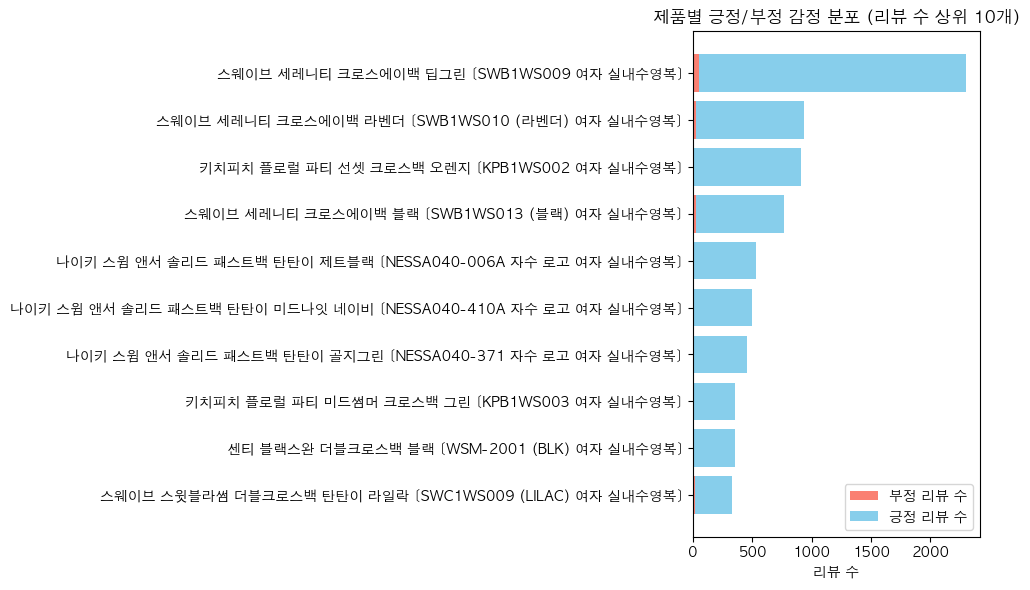

In [ ]:
# 막대그래프 그릴 순서 정렬
sentiment_plot_data_sorted = sentiment_plot_data.sort_values(by='총리뷰수', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(sentiment_plot_data_sorted.index, sentiment_plot_data_sorted['부정리뷰수'], label='부정 리뷰 수', color='salmon')
plt.barh(sentiment_plot_data_sorted.index, sentiment_plot_data_sorted['긍정리뷰수'],
         left=sentiment_plot_data_sorted['부정리뷰수'], label='긍정 리뷰 수', color='skyblue')

plt.xlabel('리뷰 수')
plt.title('제품별 긍정/부정 감정 분포 (리뷰 수 상위 10개)')
plt.legend()
plt.tight_layout()
plt.show()

- 1위와 2위가 압도적인 차이를 보여주고 있음 
- 입문용 수영복인 '스웨이브 세레니티 크로스에이백'과 '나이키 스윔 앤서 솔리드 패스트백 탄탄이' 제품이 인기가 많은 것을 확인할 수 있음
- 스웨이브 제품은 긍정 리뷰가 많은 만큼 타 제품 대비 부정 리뷰도 어느 정도 존재함

### 4-3. 부정 리뷰 비율이 높은 제품 확인

- 단순 건수로 비교 시 정확한 분석이 어려울 수 있어, 구매 대비 만족도가 낮은 제품을 확인하기 위해 부정 비율로 뽑아보았다. (부정리뷰수 / 총리뷰수)

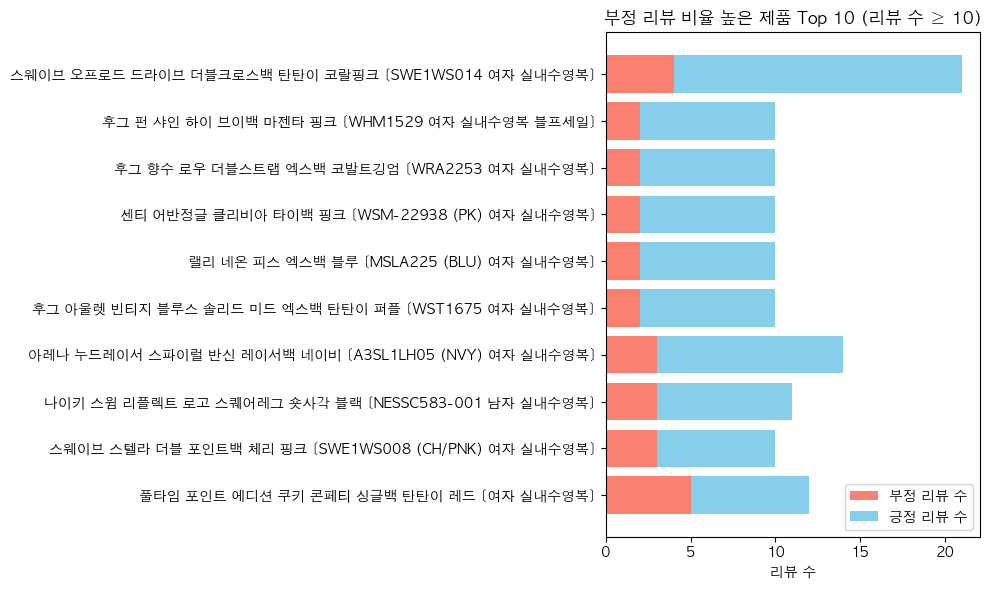

In [ ]:
# 리뷰 수 10개 이상 필터
product_sentiment_filtered = product_sentiment_counts[product_sentiment_counts['총리뷰수'] >= 10].copy()

# 부정 비율 계산
product_sentiment_filtered['부정비율'] = (
    product_sentiment_filtered['부정리뷰수'] / product_sentiment_filtered['총리뷰수']
).round(3)

# 부정 비율 Top 10
top10_negative_ratio = product_sentiment_filtered.sort_values(by='부정비율', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top10_negative_ratio.index, top10_negative_ratio['부정리뷰수'], label='부정 리뷰 수', color='salmon')
plt.barh(top10_negative_ratio.index, top10_negative_ratio['긍정리뷰수'],
         left=top10_negative_ratio['부정리뷰수'], label='긍정 리뷰 수', color='skyblue')

plt.xlabel('리뷰 수')
plt.title('부정 리뷰 비율 높은 제품 Top 10 (리뷰 수 ≥ 10)')
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
top10_negative_ratio

,부정리뷰수,긍정리뷰수,총리뷰수,부정비율
product_name,,,,
풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],5,7,12,0.417
스웨이브 스텔라 더블 포인트백 체리 핑크 [SWE1WS008 (CH/PNK) 여자 실내수영복],3,7,10,0.300
나이키 스윔 리플렉트 로고 스퀘어레그 숏사각 블랙 [NESSC583-001 남자 실내수영복],3,8,11,0.273
아레나 누드레이서 스파이럴 반신 레이서백 네이비 [A3SL1LH05 (NVY) 여자 실내수영복],3,11,14,0.214
후그 아울렛 빈티지 블루스 솔리드 미드 엑스백 탄탄이 퍼플 [WST1675 여자 실내수영복],2,8,10,0.200
랠리 네온 피스 엑스백 블루 [MSLA225 (BLU) 여자 실내수영복],2,8,10,0.200
센티 어반정글 클리비아 타이백 핑크 [WSM-22938 (PK) 여자 실내수영복],2,8,10,0.200
후그 향수 로우 더블스트랩 엑스백 코발트깅엄 [WRA2253 여자 실내수영복],2,8,10,0.200
후그 펀 샤인 하이 브이백 마젠타 핑크 [WHM1529 여자 실내수영복 블프세일],2,8,10,0.200


마찬가지로 부정 비율이 높은 제품 또한 여자 실내수영복이 가장 많았다.

### 4-4. 부정 리뷰 비율이 높은 제품들의 리뷰 내용 확인

In [136]:
# 부정 리뷰 비율 Top 10 제품
top10_product_names = product_sentiment_filtered.sort_values(by='부정비율', ascending=False).head(10).index.tolist()
top10_product_names

['풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복]',
 '스웨이브 스텔라 더블 포인트백 체리 핑크 [SWE1WS008 (CH/PNK) 여자 실내수영복]',
 '나이키 스윔 리플렉트 로고 스퀘어레그 숏사각 블랙 [NESSC583-001 남자 실내수영복]',
 '아레나 누드레이서 스파이럴 반신 레이서백 네이비 [A3SL1LH05 (NVY) 여자 실내수영복]',
 '후그 아울렛 빈티지 블루스 솔리드 미드 엑스백 탄탄이 퍼플 [WST1675 여자 실내수영복]',
 '랠리 네온 피스 엑스백 블루 [MSLA225 (BLU) 여자 실내수영복]',
 '센티 어반정글 클리비아 타이백 핑크 [WSM-22938 (PK) 여자 실내수영복]',
 '후그 향수 로우 더블스트랩 엑스백 코발트깅엄 [WRA2253 여자 실내수영복]',
 '후그 펀 샤인 하이 브이백 마젠타 핑크 [WHM1529 여자 실내수영복 블프세일]',
 '스웨이브 오프로드 드라이브 더블크로스백 탄탄이 코랄핑크 [SWE1WS014 여자 실내수영복]']

In [ ]:
# 열 너비 제한 없애기 (전체 내용 출력)
pd.set_option('display.max_colwidth', None)
# pd.reset_option('display.max_colwidth')

In [139]:
# 4. 해당 제품들의 부정 리뷰만 추출
negative_reviews_top10 = df[
    (df['product_name'].isin(top10_product_names)) &
    (df['sentiment'] == 0)
][['product_name', 'score', 'review_text']]

# 결과 확인
negative_reviews_top10[negative_reviews_top10['product_name'] == top10_product_names[0]]

,product_name,score,review_text
16160,풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],2,예쁜데.조금작아요..조금사이즈가크면좋겧네요
20125,풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],3,"늘어남이란 1도 없는 탄탄이 수영복입니다. 소재는 펑키타느낌? 아레나,나이키 처럼 늘어나는 느낌이 한개도없어서 입을때 당황했지만 쫀쫀해서 오래입을수 있을것같아요. 색상은 모델착용샷 그대로 입니다. 쨍한 느낌보다는 강렬한? 붉은빛이 도는 색입니다. 몸에 딱맞아서 쪼여지는 느낌은 좋은데 가슴선이 짧은 느낌이라 수영복을 자꾸 위로 올리게 되네요."
20610,풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],3,색상 이쁘고 사이즈도 잘 맞아요. 그런데 탄성이 없어 입고 벗을때 불편해요.
20670,풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],3,한치수 크게 사야한다해서 L로 샀어요 옆구리는 헐렁하고 엉덩이는 덜 덮히면서 헐렁해요 탄탄이인데 심한 탄탄이라 입을때 약간 불편해요 수영할때는 무리가 없어요 포인트 디자인이 약간 유아틱해서 귀여워 보인다고들 해요 (별로 안귀엽고 싶은데 ㅠㅠ)
22630,풀타임 포인트 에디션 쿠키 콘페티 싱글백 탄탄이 레드 [여자 실내수영복],3,S 했다가 M으로 바꿨는데도 작은느낌이들아요 ㅠ 엉덩이가 말려올라가는느낌쓰... 수친들은 귀엽다고합니다 ^^


In [140]:
negative_reviews_top10[negative_reviews_top10['product_name'] == top10_product_names[1]]

,product_name,score,review_text
22756,스웨이브 스텔라 더블 포인트백 체리 핑크 [SWE1WS008 (CH/PNK) 여자 실내수영복],3,색상이 차이가 좀 있고 사이즈도 평소 착용하던 브랜드보다 커서 수선했네요
23575,스웨이브 스텔라 더블 포인트백 체리 핑크 [SWE1WS008 (CH/PNK) 여자 실내수영복],1,물에 젖으면 검은안감 때문에 적색 이중천이라 기포가 많이 심함 입은 첫날....스타트데이인데....기포가 넘 심해 부끄러워 하루를 날려 먹음 입을수 없는 상태라 반품문의 했으나 이중천은 다 그래서 불가하다는 말만 듣고.. 그냥 버릴수 밖에 없었음
28493,스웨이브 스텔라 더블 포인트백 체리 핑크 [SWE1WS008 (CH/PNK) 여자 실내수영복],3,호면보다 색이. 많이 어두워요 그럭저럭 입을만 뒷태가 예뻐요~


In [141]:
negative_reviews_top10[negative_reviews_top10['product_name'] == top10_product_names[2]]

,product_name,score,review_text
2190,나이키 스윔 리플렉트 로고 스퀘어레그 숏사각 블랙 [NESSC583-001 남자 실내수영복],3,착용감도 좋고 로고나 디자인도 예쁘고 다 좋은데.. 다른후기처럼 앞 로고가 스티커처럼 일어나네요.. 일부러 탈수기도 한번도 안돌리고 구매한지 10일정도 밖에 안돼서 실착한 횟수도 많지 않은데.. 불량인건지 원래 이런제품인건지요..?
3152,나이키 스윔 리플렉트 로고 스퀘어레그 숏사각 블랙 [NESSC583-001 남자 실내수영복],1,이거 불량인가요\n로고가뜯어져요 ..
39949,나이키 스윔 리플렉트 로고 스퀘어레그 숏사각 블랙 [NESSC583-001 남자 실내수영복],1,로고 두번입고 바로 떨어짐 물속이라 떨이지는게 당연한대..2번입고떨이짐..


In [142]:
negative_reviews_top10[negative_reviews_top10['product_name'] == top10_product_names[3]]

,product_name,score,review_text
10400,아레나 누드레이서 스파이럴 반신 레이서백 네이비 [A3SL1LH05 (NVY) 여자 실내수영복],3,"평소 L 입어서..싸이즈 95로 알고있었는데, 90으로 왔더라고요. 구매시 맨아래 참고표를 못봤네요~ 입어보니 원단은 편하긴한데~ 전체적으로 몸을 잡아주는 느낌없고, 다리 아래 시보리 부분이 꽉 쪼이네요~"
11306,아레나 누드레이서 스파이럴 반신 레이서백 네이비 [A3SL1LH05 (NVY) 여자 실내수영복],3,좀얇은감이 있어요 착용했을때 잡아주는게 좀없어요\n한사이즈 작게 입어도 될거같아요
40701,아레나 누드레이서 스파이럴 반신 레이서백 네이비 [A3SL1LH05 (NVY) 여자 실내수영복],3,배송도 빠르고\n생각보다 디자인도\n괜찮고 착용감도 좄았어요\n항상 아레나 애용하지먄\n만족입니다


In [156]:
negative_reviews_top10[negative_reviews_top10['product_name'] == top10_product_names[4]]

,product_name,score,review_text
18299,후그 아울렛 빈티지 블루스 솔리드 미드 엑스백 탄탄이 퍼플 [WST1675 여자 실내수영복],3,가슴과 허벅지 라인 탄탄. 어깨도 끈이 탄탄해서 유연하지 않지만 전반적으로 편한 제품.
21873,후그 아울렛 빈티지 블루스 솔리드 미드 엑스백 탄탄이 퍼플 [WST1675 여자 실내수영복],2,무난한 기본스탈탄탄이제품 한사이즈크게입어도 될듯합니다


- 부정 비율이 높은 제품의 경우 사이즈 불만족과 내구성에 대한 내용임을 확인할 수 있었다.
- 따라서, 고객 만족도를 향상 시키기 위해서는 무엇보다 수영복 판매 시 정확한 사이즈 추천과 수영복 제조사의 품질 향상이 중요하다는 결론을 도출할 수 있었다.